In this Assignment, you will implement two classification machine learning algorithms Logistic Regression & Naive Bayes on the dataset given.

You will have 6 marks to implement each. Also, Compare the performance of each Algorithm

# 1 For the dataset (Liver disease dataset), implement the Naïve Bayes classifier using Python.

1.A - Import the libraries and Load the dataset and Remove/replace missing values

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import seaborn as sns

from sklearn.metrics import f1_score, precision_score, recall_score,confusion_matrix
from sklearn.model_selection  import train_test_split


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

#read .csv  file
df_nb= pd.read_csv('liver_disease_1.csv')
df_nb.head(10)

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,Yes
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,Yes
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,Yes
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,Yes
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,Yes
5,46,1.8,0.7,208,19,14,7.6,4.4,1.30,Yes
6,26,0.9,0.2,154,16,12,7.0,3.5,1.00,Yes
7,29,0.9,0.3,202,14,11,6.7,3.6,1.10,Yes
8,17,0.9,0.3,202,22,19,7.4,4.1,1.20,No
9,55,0.7,0.2,290,53,58,6.8,3.4,1.00,Yes


In [2]:
#check number of records
df_nb.shape

(583, 10)

In [3]:
#finding any null value
df_nb.isnull().any()

Age                           False
Total_Bilirubin               False
Direct_Bilirubin              False
Alkaline_Phosphotase          False
Alamine_Aminotransferase      False
Aspartate_Aminotransferase    False
Total_Protiens                False
Albumin                       False
Albumin_and_Globulin_Ratio     True
Dataset                       False
dtype: bool

In [4]:
from sklearn.preprocessing import LabelEncoder

# add NA/NAN to null values
df_nb = df_nb.fillna(method = 'ffill')

# Convert DatatSet Yes/No to 1/0 by transfrom Label Encoder
lb = LabelEncoder() 
df_nb['Dataset'] = lb.fit_transform(df_nb['Dataset'])

#Fill up 0 and NA in all columns except "Dataset"

feature_names = df_nb.columns.tolist()
feature_names.remove('Dataset')

for col in feature_names:
    df_nb[col] = df_nb[col].replace(0,np.NaN)
    mean = int(df_nb[col].mean(skipna=True))
    df_nb[col] = df_nb[col].replace(np.NaN,mean)

In [5]:
df_nb.isnull().any()

Age                           False
Total_Bilirubin               False
Direct_Bilirubin              False
Alkaline_Phosphotase          False
Alamine_Aminotransferase      False
Aspartate_Aminotransferase    False
Total_Protiens                False
Albumin                       False
Albumin_and_Globulin_Ratio    False
Dataset                       False
dtype: bool

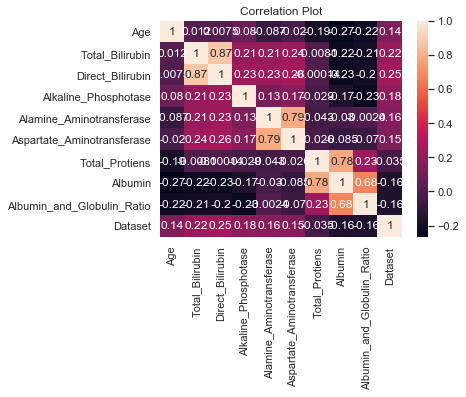

In [6]:
#correlation plot
sns.set(style="white")
sns.set(style="white",color_codes=True)
sns.heatmap(df_nb.corr(),annot=True)
plt.title('Correlation Plot')
plt.subplots_adjust(left=0.25, bottom=0.25, right=0.95, top=1, wspace=0, hspace=0)
plt.show()

Co-relation Total_bilirubin vs Direct Bilirubin


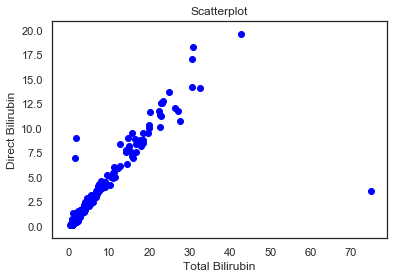

In [7]:
x = df_nb['Total_Bilirubin']
y = df_nb['Direct_Bilirubin']
plt.title('Scatterplot')
plt.xlabel('Total Bilirubin')
plt.ylabel('Direct Bilirubin')
for index in range(0,583):
    plt.scatter(x[index], y[index], c = 'blue')
print("Co-relation Total_bilirubin vs Direct Bilirubin")
plt.show()

Co-relation Age vs Total_Protiens


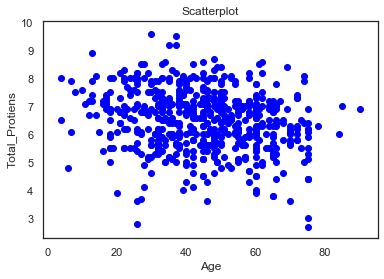

In [8]:
x = df_nb['Age']
y = df_nb['Total_Protiens']
plt.title('Scatterplot')
plt.xlabel('Age')
plt.ylabel('Total_Protiens')
for index in range(0,583):
    plt.scatter(x[index], y[index], c = 'blue')
print("Co-relation Age vs Total_Protiens")
plt.show()

1. B - Split features and labels

In [9]:
Y = df_nb['Dataset']
X = df_nb.drop('Dataset',axis=1)
X.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40


1. C - Split train and test data

In [10]:
#the proportion of labels should remain same in the splits, so we use "stratify"
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42, stratify=Y)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(466, 9)
(117, 9)
(466,)
(117,)


1. D - Implement Naïve Bayes Classifier

In [11]:
#Import Library of Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#import confusion_matrix
from sklearn.metrics import confusion_matrix

#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets 
model.fit(X_train, Y_train)

pred_reg= model.predict(X_test)

predict_proba = model.predict_proba(X_test)[:,1]

1.E - Calculate accuracy measures Printing accuracy, precision score, recall score, confusing matrix & F1 score

In [12]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

print('Classification_report for Naïve Bayes:\n',classification_report(Y_test, pred_reg))
accuracy_nb = format(accuracy_score(Y_test, pred_reg)*100)
print('Accuracy Score:',accuracy_nb)
AUC_nb= format(roc_auc_score(Y_test, predict_proba)*100)
print('AUC:',AUC_nb)

#confusion matrix
print('\nConfusion Matrix:')
cm = confusion_matrix(Y_test, pred_reg)
print('True positive = ', cm[0][0])
print('False positive = ', cm[0][1])
print('False negative = ', cm[1][0])
print('True negative = ', cm[1][1])

f1_score_nb=f1_score(Y_test, pred_reg, average="macro")
print('F1 score',f1_score_nb * 100)

Classification_report for Naïve Bayes:
               precision    recall  f1-score   support

           0       0.45      0.97      0.61        34
           1       0.98      0.51      0.67        83

    accuracy                           0.64       117
   macro avg       0.71      0.74      0.64       117
weighted avg       0.82      0.64      0.65       117

Accuracy Score: 64.1025641025641
AUC: 81.07725017717931

Confusion Matrix:
True positive =  33
False positive =  1
False negative =  41
True negative =  42
F1 score 63.888888888888886


In [13]:
# 2. For the same dataset (Liver disease dataset), implement classification using Logistic Regression using Python.

2.F - Import the libraries and Load the dataset and Remove/replace missing values (if any) 

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn

from sklearn.metrics import f1_score, precision_score, recall_score,confusion_matrix
from sklearn.model_selection  import train_test_split
from sklearn.neighbors import KNeighborsClassifier


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

#read .csv  file
df_lr= pd.read_csv('liver_disease_1.csv')
df_lr.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,Yes
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,Yes
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,Yes
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,Yes
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,Yes


In [15]:
#finding any null value
df_lr.isnull().any()

Age                           False
Total_Bilirubin               False
Direct_Bilirubin              False
Alkaline_Phosphotase          False
Alamine_Aminotransferase      False
Aspartate_Aminotransferase    False
Total_Protiens                False
Albumin                       False
Albumin_and_Globulin_Ratio     True
Dataset                       False
dtype: bool

In [16]:
from sklearn.preprocessing import LabelEncoder

# add NA/NAN to null values
df_lr = df_lr.fillna(method = 'ffill')

# Convert DatatSet Yes/No to 1/0 by transfrom Label Encoder
lb = LabelEncoder() 
df_lr['Dataset'] = lb.fit_transform(df_lr['Dataset'])

#Fill up 0 and NA in all columns except "Dataset"

feature_names = df_lr.columns.tolist()
feature_names.remove('Dataset')

for col in feature_names:
    df_lr[col] = df_lr[col].replace(0,np.NaN)
    mean = int(df_lr[col].mean(skipna=True))
    df_lr[col] = df_lr[col].replace(np.NaN,mean)

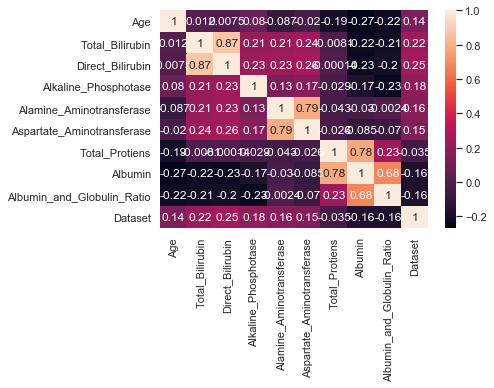

In [17]:
sns.heatmap(df_lr.corr(),annot=True)

2.G - Split features and labels

In [18]:
Y = df_lr['Dataset']
X = df_lr.drop('Dataset',axis=1)
X.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40


2.H - Split train and test data

In [19]:
#the proportion of labels should remain same in the splits, so we use "stratify"
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42, stratify=Y)

2.I - Implement Logistic regression Classifier

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report


#logistic regression
reg = LogisticRegression()
result = reg.fit(X_train, Y_train)
pred_reg = reg.predict(X_test)
predict_proba = reg.predict_proba(X_test)[:,1]

C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


2.J - Calculate accuracy measures 

In [21]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

print('Classification_report For Logistic Regression:\n',classification_report(Y_test, pred_reg))
lr_accuracy_score= format(accuracy_score(Y_test, pred_reg)*100)
print('Accuracy Score:',lr_accuracy_score)
AUC_lr = format(roc_auc_score(Y_test, predict_proba)*100)
print('AUC:',AUC_lr)

#confusion matrix
print('\nConfusion Matrix Logistic Regression:')
cm_lr = confusion_matrix(Y_test, pred_reg)
print('True positive = ', cm_lr[0][0])
print('False positive = ', cm_lr[0][1])
print('False negative = ', cm_lr[1][0])
print('True negative = ', cm_lr[1][1])

f1_score_lr=f1_score(Y_test, pred_reg, average="macro")
print('F1 score',f1_score_lr * 100)

Classification_report For Logistic Regression:
               precision    recall  f1-score   support

           0       0.64      0.26      0.37        34
           1       0.76      0.94      0.84        83

    accuracy                           0.74       117
   macro avg       0.70      0.60      0.61       117
weighted avg       0.72      0.74      0.70       117

Accuracy Score: 74.35897435897436
AUC: 83.2388377037562

Confusion Matrix Logistic Regression:
True positive =  9
False positive =  25
False negative =  5
True negative =  78
F1 score 60.68548387096774


# Performance Comparision of both algorithms

In [22]:
compare_data = {'Algorithm Name': ['Naive Bayes','Logistic Regression'],
        'Accuracy Score': [accuracy_nb,lr_accuracy_score],
        'AUC':[AUC_nb,AUC_lr],
        'CM - True Positive':[cm[0][0],cm_lr[0][0]],
        'CM - False Positive':[cm[0][1],cm_lr[0][1]],
        'CM - True Negative':[cm[1][0],cm_lr[1][0]],
        'CM - False Negative':[cm[1][1],cm_lr[1][1]],
        'F1 Score':[f1_score_nb,f1_score_lr]
        }

df_compare = pd.DataFrame(compare_data)

df_compare.head()

,Algorithm Name,Accuracy Score,AUC,CM - True Positive,CM - False Positive,CM - True Negative,CM - False Negative,F1 Score
0,Naive Bayes,64.1025641025641,81.07725017717931,33,1,41,42,0.638889
1,Logistic Regression,74.35897435897436,83.2388377037562,9,25,5,78,0.606855
